In [97]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.ticker as ticker

In [2]:
# Nhập data
link='https://drive.google.com/file/d/1rECvSeC32fbqU1HlXFBSpMyW0RrCXHmQ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
dis_df = pd.read_csv(path)

<ipython-input-2-66762e84ba2f>:4: DtypeWarning: Columns (2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dis_df = pd.read_csv(path)


In [3]:
dis_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,blood_low,sugar_lvl,payment
0,females,0.0,no,yes,never,25 19,6.6,140.0,0.0,0,Normal,VISA/Mastercard
1,woman,54.0,no,0,No Info,27.32,6.6,80.0,0.0,0,Normal,VISA/Mastercard
2,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Normal,VISA/Mastercard
3,fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Normal,VISA/Mastercard
4,males,NaN,yes,1,current,20 14,4.8,155.0,0.0,0,Normal,VISA/Mastercard
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90.0,0.0,0,Normal,VISA/Mastercard
99996,Female,2.0,0,0,No Info,17.37,6.5,100.0,0.0,0,Normal,VISA/Mastercard
99997,Male,66.0,0,0,former,27.83,5.7,155.0,0.0,0,Normal,VISA/Mastercard
99998,Female,24.0,0,0,never,35.42,4.0,100.0,0.0,0,Normal,VISA/Mastercard


PHẦN I - Kiểm tra, làm sạch, xử lý dữ liệu (Data Cleaning, Data Processing)

In [4]:
# Bước 1: Kiểm tra dạng dữ liệu và thông số dữ liệu
dis_df.info()
dis_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99868 non-null   object 
 1   age                  99849 non-null   float64
 2   hypertension         99521 non-null   object 
 3   heart_disease        99521 non-null   object 
 4   smoking_history      99521 non-null   object 
 5   bmi                  99521 non-null   object 
 6   HbA1c_level          99538 non-null   float64
 7   blood_glucose_level  99527 non-null   float64
 8   diabetes             99557 non-null   float64
 9   blood_low            100000 non-null  int64  
 10  sugar_lvl            100000 non-null  object 
 11  payment              100000 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 9.2+ MB


,age,HbA1c_level,blood_glucose_level,diabetes,blood_low
count,99849.000000,99538.000000,99527.000000,99557.000000,100000.0
mean,41.885181,5.527614,138.050750,0.085087,0.0
std,22.516740,1.070895,40.737119,0.279012,0.0
min,0.000000,3.500000,0.000000,0.000000,0.0
25%,24.000000,4.800000,100.000000,0.000000,0.0
50%,43.000000,5.800000,140.000000,0.000000,0.0
75%,60.000000,6.200000,159.000000,0.000000,0.0
max,80.000000,9.000000,300.000000,1.000000,0.0


In [5]:
# Bước 2: Tra khảo thông tin về giá trị riêng biệt unique và số NULL trong từng cột
for column in dis_df.columns:
    unique_values = dis_df[column].unique()
    null_count = dis_df[column].isnull().sum()

    # Kiểm tra số lượng giá trị duy nhất
    if len(unique_values) > 10:
        unique_values = list(unique_values[:5]) + [f"+{len(unique_values) - 5}"]

    print(f"Các giá trị riêng biệt của cột '{column}' là: {unique_values}")
    print(f"Số NULL trong cột '{column}' là: {null_count}")

    # Trường hợp: Nếu chỉ có 2 giá trị trong cột
    if 0 in unique_values and 1 in unique_values and len(unique_values) < 6:
      print("Cột này chứa 2 giá trị dạng binary, ở đây 0 sẽ tương đương với Không và 1 sẽ tương đương với có, ngoài ra các giá trị khác cần bị loại bỏ.")

    # Trường hợp: Cột thừa nếu chỉ có 1 giá trị riêng biệt
    if len(unique_values) == 1:
      print("Cột này chỉ có 1 giá trị duy nhất, cần bị xóa bỏ.")

    print("-" * 30)

Các giá trị riêng biệt của cột 'gender' là: ['females', 'woman', 'Male', 'fe', 'males', '+19']
Số NULL trong cột 'gender' là: 132
------------------------------
Các giá trị riêng biệt của cột 'age' là: [0.0, 54.0, nan, 20.0, 40.0, '+99']
Số NULL trong cột 'age' là: 151
------------------------------
Các giá trị riêng biệt của cột 'hypertension' là: ['no' nan 'yes' '0' '1' 0 1]
Số NULL trong cột 'hypertension' là: 479
------------------------------
Các giá trị riêng biệt của cột 'heart_disease' là: ['yes' '0' nan '1' 'no' 0 1]
Số NULL trong cột 'heart_disease' là: 479
------------------------------
Các giá trị riêng biệt của cột 'smoking_history' là: ['never' 'No Info' nan 'current' 'former' 'ever' 'not current']
Số NULL trong cột 'smoking_history' là: 479
------------------------------
Các giá trị riêng biệt của cột 'bmi' là: ['25 19', '27.32', nan, '20 14', '19 31', '+7503']
Số NULL trong cột 'bmi' là: 479
------------------------------
Các giá trị riêng biệt của cột 'HbA1c_level' là:

In [6]:
# Bước 3: Kiểm tra các cột trùng toàn bộ giá trị
duplicates = dis_df.duplicated(subset=None, keep='first')

# Đếm số cột trùng toàn bộ
duplicate_count = duplicates.sum()
print('Số cột bị lặp trong bảng là: ',duplicate_count)

Số cột bị lặp trong bảng là:  2611


Vì dataset trên không hề có cột mang khóa chính, và có tới 2611 dòng lặp được tìm ra, như vậy ta có thể suy luận là KHÔNG cần làm bước xóa lặp **(REMOVE DUPLICATES)** cho bảng dữ liệu.

In [7]:
# Bước 5: Xóa cột thừa
# (Cả cột chỉ có 1 giá trị tính là thừa)
# dis_df.drop('blood_low', axis=1)    # Xóa cột blood_low
# dis_df.drop('sugar_lvl', axis=1)    # Xóa cột sugar_lvl
# dis_df.drop('payment', axis=1)      # Xóa cột payment
dis_df = dis_df.iloc[:, :-3]

In [8]:
# Bước 6: Xóa các dòng không mang lại giá trị phân tích
# Dòng mà có 5 giá trị NULL sẽ bị loại bỏ luôn
null_check5 = dis_df.isnull().sum(axis=1)
dis_df = dis_df[null_check5 < 5]

In [9]:
# Bước 7: Chỉnh sửa các giá trị cho đồng bộ ở cột gender

# Sửa chung về Female (F, Fe, Females, Lady, Girl, Girls, Woman, Women)
# Sửa chung về Male (M, Males, Boy, Gentleman, Man, Men)
# Sửa chung về cột Other (NULL, O, X, trans, gay, lesbian, other gender, ...)

# Tạo từ điển cho 3 loại giá trị
gender_dict = {'F': 'Female', 'FE': 'Female', 'FEMALES': 'Female', 'GIRL': 'Female', 'GIRLS': 'Female', 'WOMAN': 'Female', 'WOMEN': 'Female',
                'M': 'Male', 'MALES': 'Male', 'BOY': 'Male', 'GENTLEMAN': 'Male', 'MAN': 'Male', 'MEN': 'Male',
                'O': 'Other', 'X': 'Other', 'TRANS': 'Other', 'GAY': 'Other', 'LESBIAN': 'Other', 'OTHER GENDER': 'Other'}

# Dùng str.replace() để sửa các giá trị (áp dụng cho mọi loại chữ in hoa in thường)
dis_df['gender'] = dis_df['gender'].str.upper().replace(gender_dict).str.capitalize()

# Sửa các giá trị NULL sang Other
dis_df['gender'].fillna("Other", inplace=True)

# # Xóa tất cả các dòng chứa gender SAI
# valid_genders = ['Male', 'Female', 'Other']
# dis_df = dis_df[dis_df['gender'].isin(valid_genders)]

In [10]:
# Bước 8: Xóa các giá trị sai dạng dữ liệu và ngoài vùng dữ liệu trong cột age

def generate_random_age():
    np.random.seed()
    return np.random.randint(1, 80)

# Thay giá trị null
dis_df['age'] = dis_df['age'].apply(lambda x: generate_random_age() if pd.isnull(x) else x)

In [11]:
# Bước 9: Chỉnh sửa dữ liệu cột hypertension và heart_disease cho đồng dạng để phân tích

# Tạo từ điển cho Yes và No ở 2 cột
binary_dict = {'Yes': '1', 'No': '0'}

# Dùng str.replace() để sửa các giá trị (áp dụng cho mọi loại chữ in hoa in thường)
for key, value in binary_dict.items():
    dis_df['hypertension'] = dis_df['hypertension'].str.replace(key, value, regex=True, case=False)
    dis_df['heart_disease'] = dis_df['heart_disease'].str.replace(key, value, regex=True, case=False)

dis_df['hypertension'].fillna(0, inplace=True)
dis_df['heart_disease'].fillna(0, inplace=True)

In [12]:
# Bước 10: Mã hóa cột smoking_history
dis_df['smoking_history'] = label_encoder.fit_transform(dis_df['smoking_history'])

# Get the mapping of labels to original values
label_mapping_smoking = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping_smoking

{'No Info': 0,
 'current': 1,
 'ever': 2,
 'former': 3,
 'never': 4,
 'not current': 5}

In [13]:
# Bước 11: Sửa dấu ngăn cách của số thập phân về dấu chấm trong cột 'bmi'
dis_df['bmi'] = dis_df['bmi'].str.replace(' ', '.')

# Tìm giá trị phổ biến nhất
mode_bmi = dis_df['bmi'].mode()
most_common_bmi = mode_bmi[0]

# Thay các giá trị NULL và 0 bằng giá trị phổ biến nhất
dis_df['bmi'].fillna(most_common_bmi, inplace=True)
dis_df['bmi'] = dis_df['bmi'].replace(0, most_common_bmi)

In [14]:
# Bước 12: Sửa các giá trị NULL và giá trị ngoại biên trong cột 'blood_glucose_level'

# Tìm giá trị phổ biến nhất
mode_blood = dis_df['blood_glucose_level'].mode()
most_common_value = mode_blood[0]

# Thay các giá trị NULL và 0 bằng giá trị phổ biến nhất
dis_df['blood_glucose_level'].fillna(most_common_value, inplace=True)
dis_df['blood_glucose_level'] = dis_df['blood_glucose_level'].replace(0, most_common_value)
dis_df['blood_glucose_level'] = dis_df['blood_glucose_level'].astype(float)

In [15]:
# Bước 13: Mã hóa cột gender
# dis_df['gender'].replace(to_replace=['Male', 'Female', 'Other'], value=[0,1,2],inplace=True)

dis_df['gender'] = label_encoder.fit_transform(dis_df['gender'])
# MAP
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'Female': 0, 'Male': 1, 'Other': 2}

In [16]:
# Bước 14: Sửa loại dữ liệu cho từng cột cho đúng
dis_df['gender'] = dis_df['gender'].astype(int)
dis_df['age'] = dis_df['age'].astype(int)
dis_df['hypertension'] = dis_df['hypertension'].astype(int)
dis_df['heart_disease'] = dis_df['heart_disease'].astype(int)
dis_df['smoking_history'] = dis_df['smoking_history'].astype(int)
dis_df['bmi'] = dis_df['bmi'].astype(float)
dis_df['HbA1c_level'] = dis_df['HbA1c_level'].astype(float)
dis_df['blood_glucose_level'] = dis_df['blood_glucose_level'].astype(float)
dis_df['diabetes'] = dis_df['diabetes'].astype(int)

<Axes: ylabel='diabetes'>

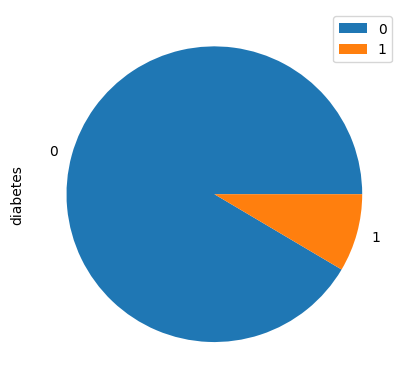

In [17]:
# Bước 15+: Tỷ lệ diabetes cũ
dis_df['diabetes'].value_counts().plot.pie(legend = ['0','1'])

In [18]:
# Bước 15: Xóa toàn bộ bảng dữ liệu, giữ lại 40% số dòng để phân tích (chỉ xóa dữ liệu diabetes = 0)

# Lấy ra các dòng với giá trị 0 ở cột diabetes
mask = (dis_df['diabetes'] == 0)

# Lấy index các dòng đó
indices_to_remove = dis_df[mask].index

# Chọn ngẫu nhiên 75000 sample để xóa dữ liệu (diabetes 0)
sample_size = 75000
if len(indices_to_remove) > sample_size:
    indices_to_remove = random.sample(list(indices_to_remove), sample_size)

# Xóa dòng sử dụng drop
dis_df.drop(indices_to_remove, inplace=True)

<Axes: ylabel='diabetes'>

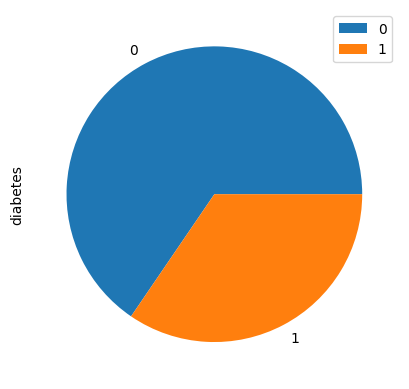

In [19]:
# Bước 15+: Tỷ lệ diabetes mới
dis_df['diabetes'].value_counts().plot.pie(legend = ['0','1'])

In [20]:
dis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24521 entries, 6 to 99995
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               24521 non-null  int64  
 1   age                  24521 non-null  int64  
 2   hypertension         24521 non-null  int64  
 3   heart_disease        24521 non-null  int64  
 4   smoking_history      24521 non-null  int64  
 5   bmi                  24521 non-null  float64
 6   HbA1c_level          24521 non-null  float64
 7   blood_glucose_level  24521 non-null  float64
 8   diabetes             24521 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.9 MB


In [21]:
dis_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,0,40,0,0,4,19.31,6.5,200.0,1
13,0,67,0,0,4,25.69,5.8,130.0,0
26,1,67,0,1,5,27.32,6.5,200.0,1
32,0,41,0,0,1,22.01,6.2,126.0,0
38,1,50,1,0,1,27.32,5.7,260.0,1
...,...,...,...,...,...,...,...,...,...
99976,1,13,0,0,4,27.32,4.8,140.0,0
99979,0,61,0,0,1,27.32,6.2,240.0,1
99984,1,80,0,0,0,27.32,6.6,85.0,0
99992,0,26,0,0,4,27.32,6.5,160.0,0


PHẦN II: Khai phá dữ liệu (EDA)

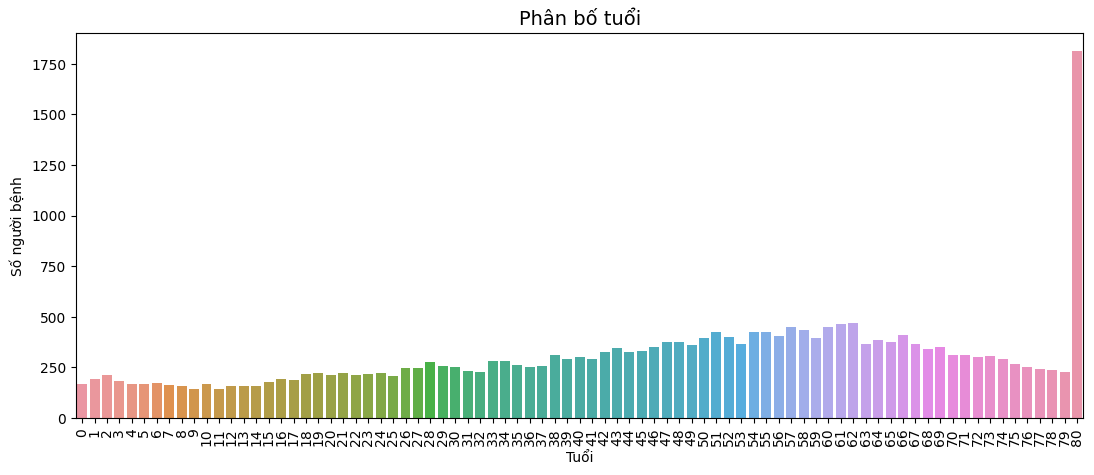

In [22]:
# Kiểm tra sự phân bố 'age'
plt.figure(figsize=(13,5))
sns.countplot(x=dis_df['age'])
plt.title('Phân bố tuổi', fontsize=14)
plt.xticks(rotation=90)
plt.xlabel('Tuổi')
plt.ylabel('Số người bệnh')
plt.show()

<ipython-input-23-c582be63b2f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_diabetes_df['age_group'] = pd.cut(has_diabetes_df['age'], bins=age_bins, labels=age_labels)


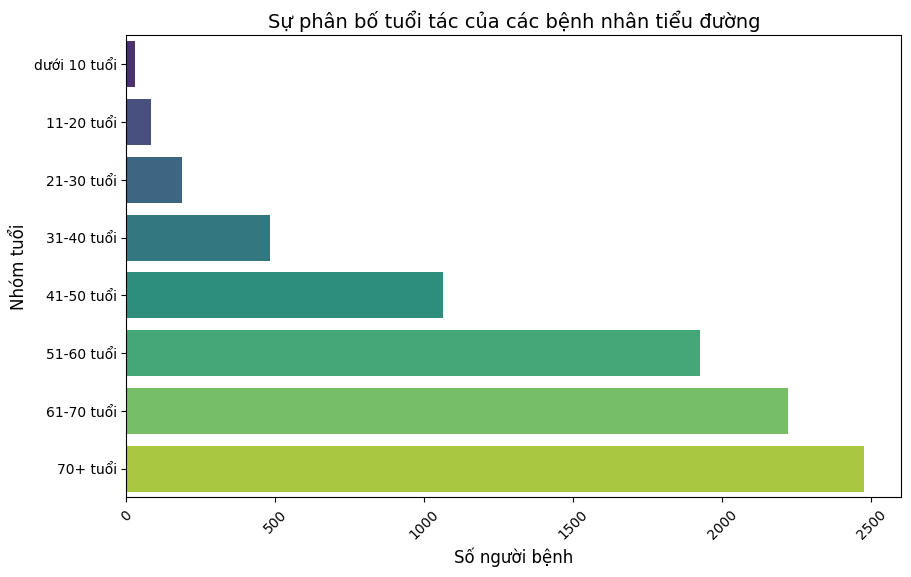

In [23]:
# Tạo bin và label cho các nhóm tuổi
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
age_labels = ["dưới 10 tuổi", "11-20 tuổi", "21-30 tuổi", "31-40 tuổi", "41-50 tuổi", "51-60 tuổi", "61-70 tuổi", "70+ tuổi"]

# Tách ra những người bị tiểu đường (giá trị diabetes = 1)
has_diabetes_df = dis_df[dis_df['diabetes'] == 1]

# Tạo cột mới dựa vào bin và label
has_diabetes_df['age_group'] = pd.cut(has_diabetes_df['age'], bins=age_bins, labels=age_labels)

# Group by 'age_group'
age_group_counts = has_diabetes_df['age_group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

# Vẽ chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Age Group', data=age_group_counts, palette='viridis')
plt.title('Sự phân bố tuổi tác của các bệnh nhân tiểu đường', fontsize=14)
plt.xlabel('Số người bệnh', fontsize=12)
plt.ylabel('Nhóm tuổi', fontsize=12)
plt.xticks(rotation=45)
plt.show()

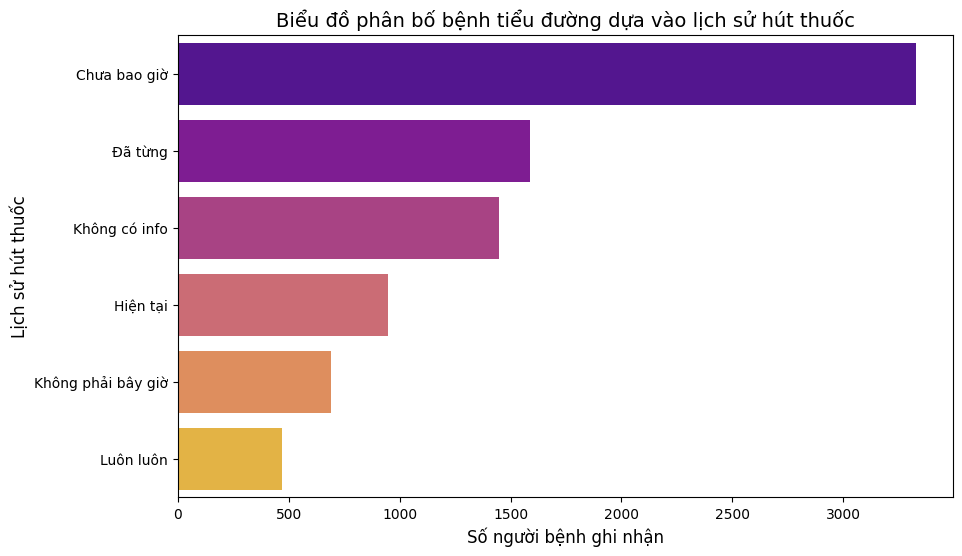

In [24]:
# Lọc ra các bệnh nhân tiểu đường (diabetes == 1)
has_diabetes_df = dis_df[dis_df['diabetes'] == 1]

# Group by 'smoking_history' và đếm giá trị
smoking_history_counts = has_diabetes_df['smoking_history'].value_counts().reset_index()
smoking_history_counts.columns = ['Smoking History', 'Count']

# Gán giá trị tần suất Smoking
smoking_history_counts['Smoking History'] = smoking_history_counts['Smoking History'].map({0: 'Không có info', 1: 'Hiện tại', 2: 'Luôn luôn', 3: 'Đã từng', 4: 'Chưa bao giờ', 5: 'Không phải bây giờ'})

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Smoking History', data=smoking_history_counts, palette='plasma')
plt.title('Biểu đồ phân bố bệnh tiểu đường dựa vào lịch sử hút thuốc', fontsize=14)
plt.xlabel('Số người bệnh ghi nhận', fontsize=12)
plt.ylabel('Lịch sử hút thuốc', fontsize=12)

plt.xticks(rotation=0)
plt.show()

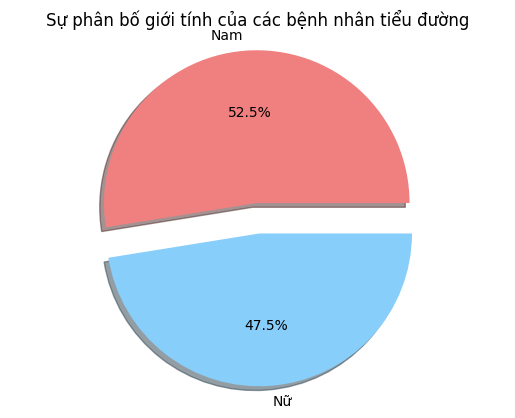

In [25]:
# Lọc ra các bệnh nhân tiểu đường (diabetes == 1)
diabetes_df = dis_df[dis_df['diabetes'] == 1]

# Đếm sự xuất hiện của người bệnh cho mỗi giới tính
gender_counts = diabetes_df['gender'].value_counts()

# Vẽ biểu đồ bánh
labels = ['Nam', 'Nữ']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0.1)  # Tách các miếng bánh

plt.pie(gender_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Sự phân bố giới tính của các bệnh nhân tiểu đường')
plt.axis('equal')  # Dùng equal để cố định size bánh

plt.show()

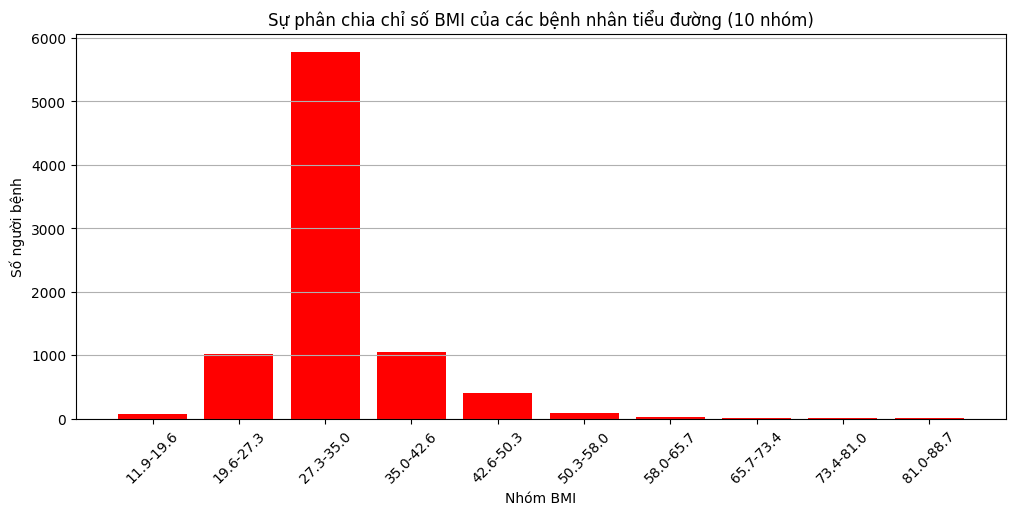

In [26]:
# Lọc ra các bệnh nhân tiểu đường (diabetes == 1)
diabetes_df = dis_df[dis_df['diabetes'] == 1]

# Tạo 10 thùng chứa 10 nhóm giá trị chia đều từ min đến max
num_bins = 10
bins = np.linspace(min(diabetes_df['bmi']), max(diabetes_df['bmi']), num_bins + 1)

# Sử dụng `numpy` histogram để đếm giá trị trong từng thùng
hist, _ = np.histogram(diabetes_df['bmi'], bins=bins)

# Tạo LABEL của mỗi thùng dựa vào giá trị thùng
bin_labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(num_bins)]

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 5))
plt.bar(range(num_bins), hist, tick_label=bin_labels, color='r')
plt.title('Sự phân chia chỉ số BMI của các bệnh nhân tiểu đường (10 nhóm)')
plt.xlabel('Nhóm BMI')
plt.ylabel('Số người bệnh')
plt.xticks(rotation=45)  # Xoay trục X 45 độ
plt.grid(axis='y')

plt.show()

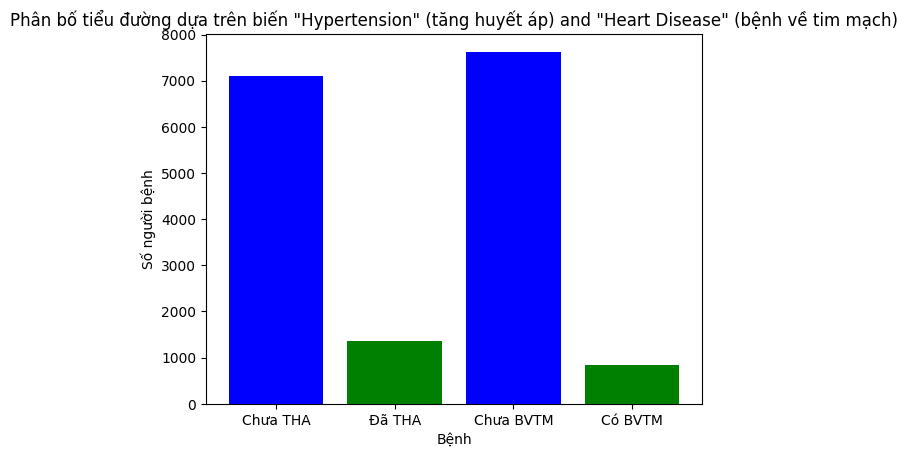

In [27]:
# Lọc ra các bệnh nhân tiểu đường (diabetes == 1)
diabetes_df = dis_df[dis_df['diabetes'] == 1]

# Đếm sự xuất hiện của 'hypertension' và 'heart_disease' cho người tiểu đường
hypertension_counts = diabetes_df['hypertension'].value_counts()
heart_disease_counts = diabetes_df['heart_disease'].value_counts()

# Tạo biểu đồ cột cho 2 loại cột (Cột kép)
x = ['Chưa THA', 'Đã THA', 'Chưa BVTM', 'Có BVTM']
y = [hypertension_counts[0], hypertension_counts[1], heart_disease_counts[0], heart_disease_counts[1]]

plt.bar(x, y, color=['b', 'g', 'b', 'g'])
plt.title('Phân bố tiểu đường dựa trên biến "Hypertension" (tăng huyết áp) and "Heart Disease" (bệnh về tim mạch)')
plt.xlabel('Bệnh')
plt.ylabel('Số người bệnh')

plt.show()

<ipython-input-28-b1e7aadef93e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_diabetes_df['blood_group'] = pd.cut(has_diabetes_df['blood_glucose_level'], bins=blood_bins, labels=blood_labels)


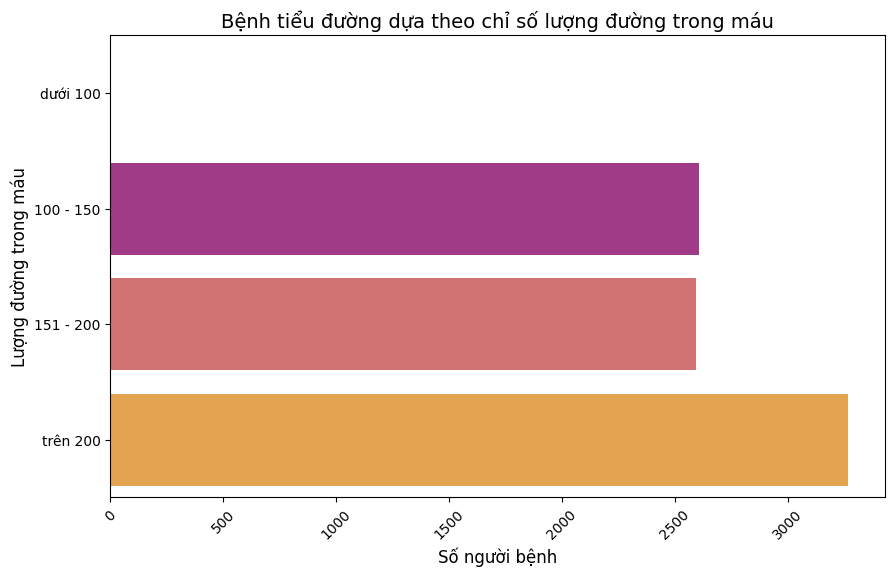

In [28]:
# Tạo bin và label cho các nhóm tuổi
blood_bins = [0, 100, 150, 200, 999]
blood_labels = ["dưới 100", "100 - 150", "151 - 200", "trên 200"]

# Tách ra những người bị tiểu đường (giá trị diabetes = 1)
has_diabetes_df = dis_df[dis_df['diabetes'] == 1]

# Tạo cột mới dựa vào bin và label
has_diabetes_df['blood_group'] = pd.cut(has_diabetes_df['blood_glucose_level'], bins=blood_bins, labels=blood_labels)

# Group by 'blood_group'
blood_group_counts = has_diabetes_df['blood_group'].value_counts().reset_index()
blood_group_counts.columns = ['Blood Group', 'Count']

# Vẽ chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Blood Group', data=blood_group_counts, palette='plasma')
plt.title('Bệnh tiểu đường dựa theo chỉ số lượng đường trong máu', fontsize=14)
plt.xlabel('Số người bệnh', fontsize=12)
plt.ylabel('Lượng đường trong máu', fontsize=12)
plt.xticks(rotation=45)
plt.show()

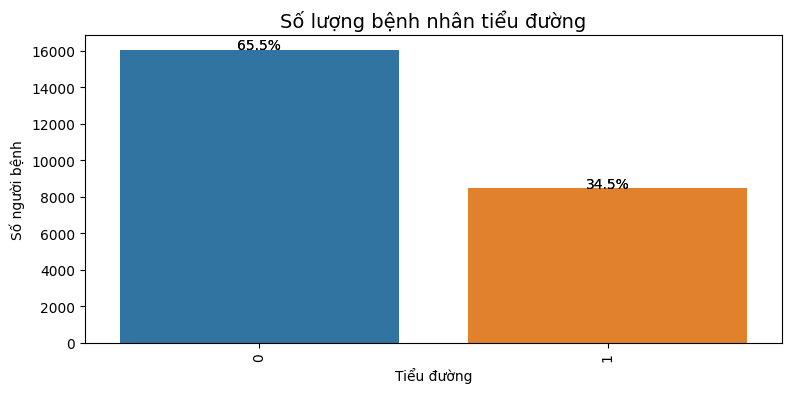

In [29]:
# Kiểm tra số lượng bệnh nhân tiểu đường 'diabetes'
plt.figure(figsize=(9,4))
ax = sns.countplot(x=dis_df['diabetes'])
sns.countplot(x=dis_df['diabetes'])
plt.title('Số lượng bệnh nhân tiểu đường', fontsize=14)
plt.xlabel('Tiểu đường')
plt.ylabel('Số người bệnh')
plt.xticks(rotation=90)

# Cho phần trăm các cột
total = len(dis_df['diabetes'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

PHẦN III - Xây dựng mô hình dự đoán cho dữ liệu

Vẽ biểu đồ tương quan trước và sau khi cân bằng

<Axes: >

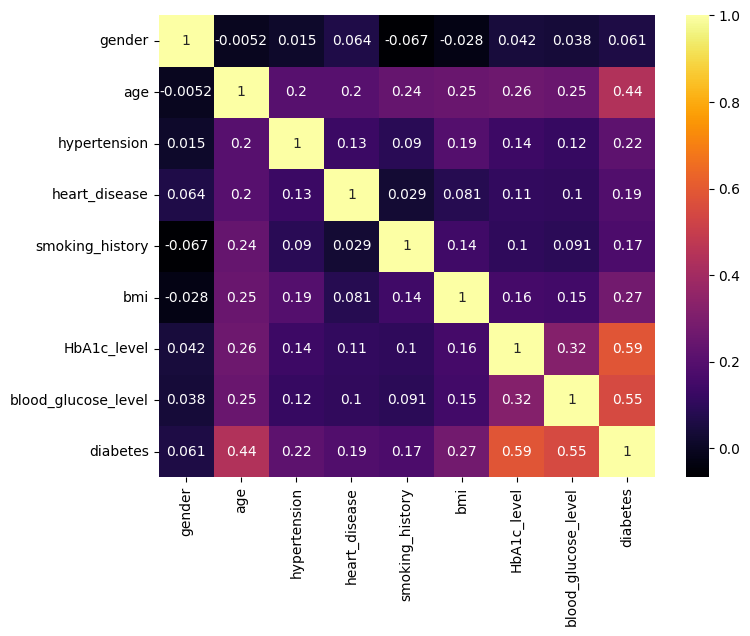

In [30]:
# Biểu đồ tương quan trước khi cân bằng
plt.figure(figsize=(8,6))
sns.heatmap(dis_df.corr(), annot=True, cmap='inferno')

In [31]:
# Sử dụng Undersampling để cân bằng dữ liệu (Tỷ lệ hiện tại 66 - 34)

diabetes_df = dis_df.loc[dis_df['diabetes'] == 1]
non_diabetes_df = dis_df.loc[dis_df['diabetes'] == 0][:len(diabetes_df)]
new_df = pd.concat([diabetes_df, non_diabetes_df])

# Đảo vị trí các cột
new_df = new_df.sample(frac=1, random_state=24)

# Kiểm tra sự cân bằng
new_df.diabetes.value_counts()

0    8466
1    8466
Name: diabetes, dtype: int64

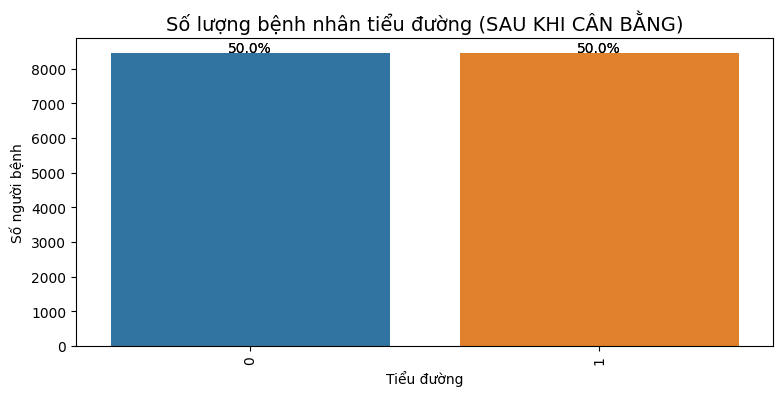

In [32]:
# Kiểm tra số lượng bệnh nhân tiểu đường 'diabetes' sau khi cân bằng
plt.figure(figsize=(9,4))
ax = sns.countplot(x=new_df['diabetes'])
sns.countplot(x=new_df['diabetes'])
plt.title('Số lượng bệnh nhân tiểu đường (SAU KHI CÂN BẰNG)', fontsize=14)
plt.xlabel('Tiểu đường')
plt.ylabel('Số người bệnh')
plt.xticks(rotation=90)

# Cho phần trăm các cột
total = len(new_df['diabetes'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

<Axes: >

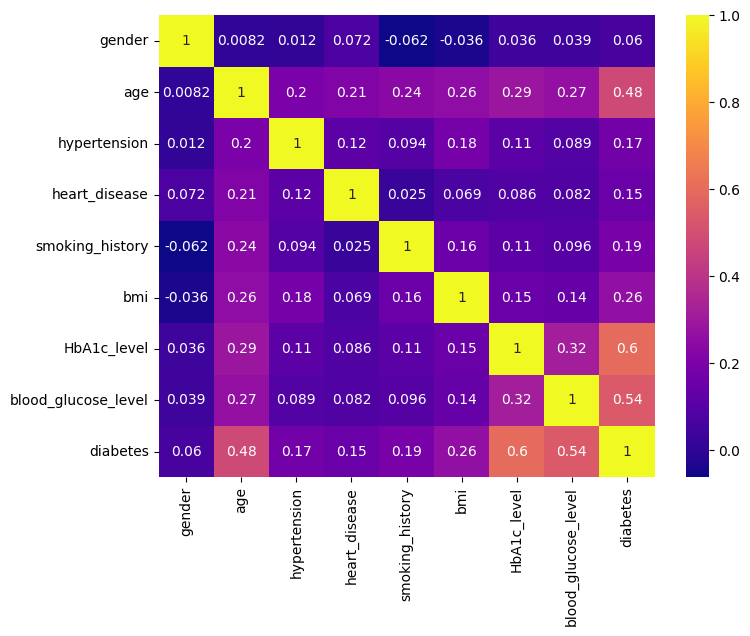

In [33]:
# Biểu đồ tương quan sau khi cân bằng
plt.figure(figsize=(8,6))
sns.heatmap(new_df.corr(), annot=True, cmap='plasma')

In [34]:
# Dựng biến và chia tập train/test cho data SAU khi cân bằng
X = new_df.drop('diabetes', axis=1)
y = new_df['diabetes']

# Chia tập test và train với random_state=0
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Xây dựng mô hình Logistic Regression

In [35]:
# Import mô hình LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train mô hình
start_time_log = time.time()  # Bắt đầu tính giờ
model_log = LogisticRegression()
model_log.fit(x_train, y_train) # Training

# Tính toán độ chính xác của mô hình
y_log = model_log.predict(x_test)
end_time_log = time.time()    # Kết thúc tính giờ
run_time_log = end_time_log - start_time_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Classification Report
classification_log = classification_report(y_test, y_log, target_names=["Không tiểu đường", "Có tiểu đường"])
print(classification_log)

                  precision    recall  f1-score   support

Không tiểu đường       0.87      0.88      0.88      4228
   Có tiểu đường       0.88      0.87      0.88      4238

        accuracy                           0.88      8466
       macro avg       0.88      0.88      0.88      8466
    weighted avg       0.88      0.88      0.88      8466



In [37]:
# In ra thông tin Classification Report
report_log = classification_report(y_test, y_log, output_dict=True)

# Lấy precision, recall, F1-score của từng lớp và accuracy
precision_log = report_log['0']['precision'], report_log['1']['precision']
recall_log = report_log['0']['recall'], report_log['1']['recall']
f1_score_log = report_log['0']['f1-score'], report_log['1']['f1-score']
accuracy_log = report_log['accuracy']

print("Precision cho lớp 'Không tiểu đường':", precision_log[0])
print("Precision cho lớp 'Có tiểu đường':", precision_log[1])
print()
print("Recall cho lớp 'Không tiểu đường':", recall_log[0])
print("Recall cho lớp 'Có tiểu đường':", recall_log[1])
print()
print("F1-score cho lớp 'Không tiểu đường':", f1_score_log[0])
print("F1-score cho lớp 'Có tiểu đường':", f1_score_log[1])
print()
print("Accuracy của phép Logistic Regression:", accuracy_log)

# Hiệu suất thời gian
print(f'Hiệu suất thời gian cho mô hình Logistic Regression là: {round(run_time_log,3)} giây')

Precision cho lớp 'Không tiểu đường': 0.872752743404156
Precision cho lớp 'Có tiểu đường': 0.8828591919674874

Recall cho lớp 'Không tiểu đường': 0.8841059602649006
Recall cho lớp 'Có tiểu đường': 0.8714016045304389

F1-score cho lớp 'Không tiểu đường': 0.8783926683115968
F1-score cho lớp 'Có tiểu đường': 0.8770929818311365

Accuracy của phép Logistic Regression: 0.8777462792345854
Hiệu suất thời gian cho mô hình Logistic Regression là: 0.154 giây


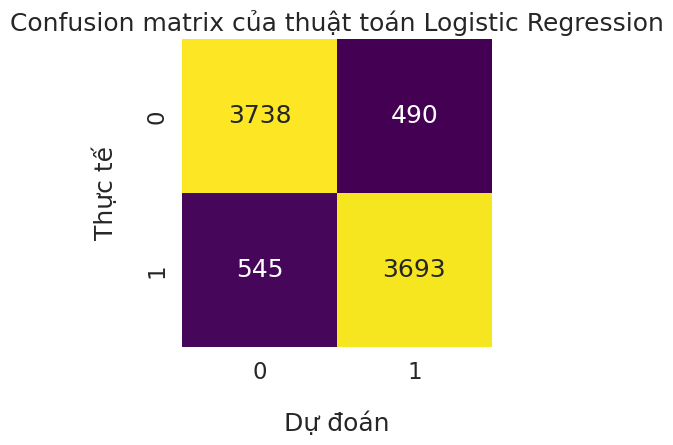

In [106]:
# Vẽ confusion matrix
conf_matrix = confusion_matrix(y_test, y_log, labels=[0, 1])
vmax_value = conf_matrix.max()
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.5)
ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='viridis', vmax=vmax_value
)
ax.set_xlabel("Dự đoán", labelpad=20)
ax.set_ylabel("Thực tế", labelpad=20)
plt.title("Confusion matrix của thuật toán Logistic Regression")
plt.show()

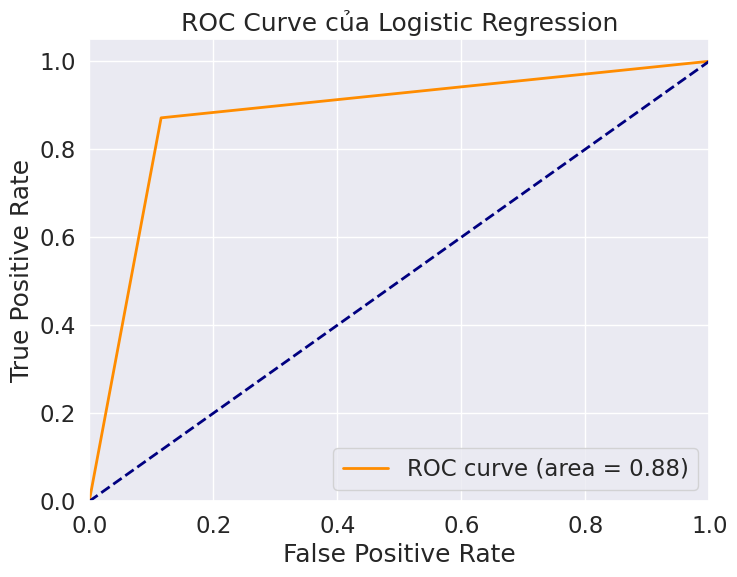

In [61]:
# Tính đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_log)

# Tính ROC AUC
roc_auc = roc_auc_score(y_test, y_log)

# Vẽ hình ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve của Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Xây dựng mô hình Gaussian Naive Classifier

In [39]:
# Import mô hình Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Train mô hình
start_time_GNB = time.time()  # Bắt đầu tính giờ
GNB = GaussianNB()
GNB.fit(x_train, y_train)

# Tính toán độ chính xác của mô hình
y_GNB=GNB.predict(x_test)
end_time_GNB = time.time()  # Kết thúc tính giờ
run_time_GNB = end_time_GNB - start_time_GNB

In [40]:
# Classification Report
classification_GNB = classification_report(y_test, y_GNB, target_names=["Không tiểu đường", "Có tiểu đường"])
print(classification_GNB)

                  precision    recall  f1-score   support

Không tiểu đường       0.78      0.90      0.84      4228
   Có tiểu đường       0.88      0.75      0.81      4238

        accuracy                           0.82      8466
       macro avg       0.83      0.82      0.82      8466
    weighted avg       0.83      0.82      0.82      8466



In [41]:
# In ra thông tin chỉ số Classification Report
report_GNB = classification_report(y_test, y_GNB, output_dict=True)

# Lấy precision, recall, F1-score của từng lớp và accuracy
precision_GNB = report_GNB['0']['precision'], report_GNB['1']['precision']
recall_GNB = report_GNB['0']['recall'], report_GNB['1']['recall']
f1_score_GNB = report_GNB['0']['f1-score'], report_GNB['1']['f1-score']
accuracy_GNB = report_GNB['accuracy']

print("Precision cho lớp 'Không tiểu đường':", precision_GNB[0])
print("Precision cho lớp 'Có tiểu đường':", precision_GNB[1])
print()
print("Recall cho lớp 'Không tiểu đường':", recall_GNB[0])
print("Recall cho lớp 'Có tiểu đường':", recall_GNB[1])
print()
print("F1-score cho lớp 'Không tiểu đường':", f1_score_GNB[0])
print("F1-score cho lớp 'Có tiểu đường':", f1_score_GNB[1])
print()
print("Accuracy của phép GNB:", accuracy_GNB)

# Hiệu suất thời gian
print(f'Hiệu suất thời gian cho mô hình Gaussian Naive Bayes là: {round(run_time_GNB,3)} giây')

Precision cho lớp 'Không tiểu đường': 0.7827792690481107
Precision cho lớp 'Có tiểu đường': 0.8793817278498481

Recall cho lớp 'Không tiểu đường': 0.8966414380321666
Recall cho lớp 'Có tiểu đường': 0.7517697026899481

F1-score cho lớp 'Không tiểu đường': 0.8358505126226435
F1-score cho lớp 'Có tiểu đường': 0.8105838951787304

Accuracy của phép GNB: 0.824120009449563
Hiệu suất thời gian cho mô hình Gaussian Naive Bayes là: 0.009 giây


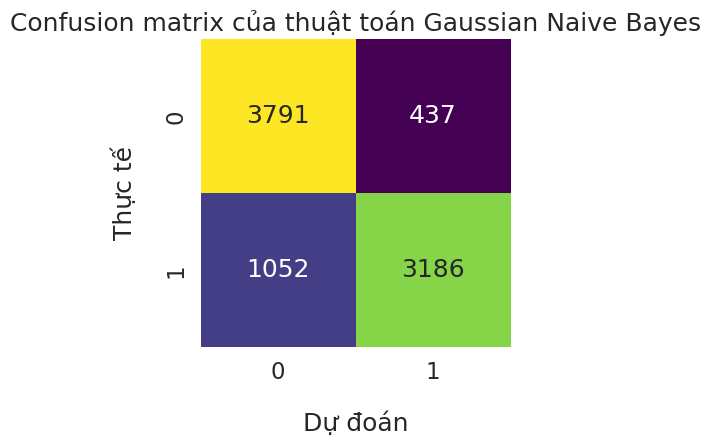

In [62]:
# Vẽ confusion matrix
conf_matrix = confusion_matrix(y_test, y_GNB, labels=[0, 1])
vmax_value = conf_matrix.max()
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.5)
ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='viridis', vmax=vmax_value
)
ax.set_xlabel("Dự đoán", labelpad=20)
ax.set_ylabel("Thực tế", labelpad=20)
plt.title("Confusion matrix của thuật toán Gaussian Naive Bayes")
plt.show()

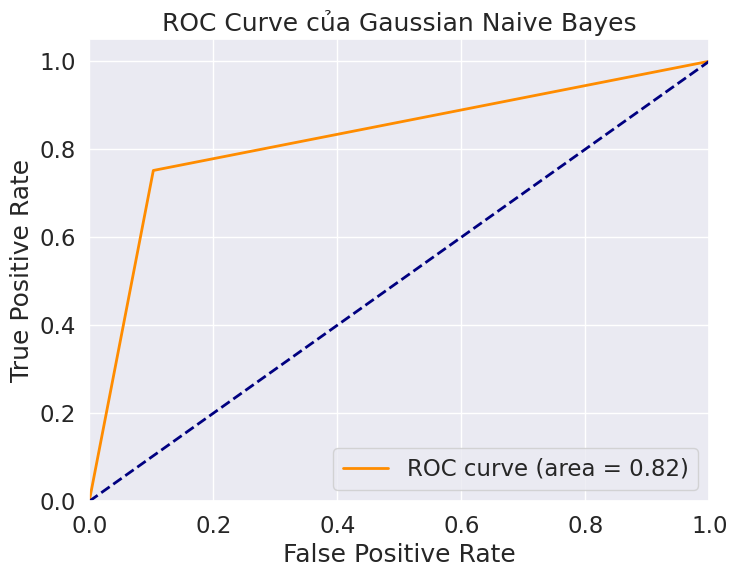

In [63]:
# Tính đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_GNB)

# Tính ROC AUC
roc_auc = roc_auc_score(y_test, y_GNB)

# Vẽ hình ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve của Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()

Xây dựng mô hình Random Forest

In [64]:
# Tạo tập parameter thử nghiệm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [4, 6, 8]
}

start_time_tree = time.time()
rfc=RandomForestClassifier(random_state=0)
model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='f1_macro')
model.fit(x_train, y_train)

# Tạo model với best parameter
print(model.best_params_)
n_estimators = model.best_params_['n_estimators']
max_depth = model.best_params_['max_depth']

best_model = RandomForestClassifier(random_state = 0,
                                    n_estimators = n_estimators,
                                    max_depth = max_depth)
best_model.fit(x_train, y_train)
end_time_tree = time.time()
run_time_tree = end_time_tree - start_time_tree

# predict và đánh giá
y_tree = best_model.predict(x_test)

{'max_depth': 8, 'n_estimators': 200}


In [65]:
# Classification Report
classification_tree = classification_report(y_test, y_tree, target_names=["Không tiểu đường", "Có tiểu đường"])
print(classification_tree)

                  precision    recall  f1-score   support

Không tiểu đường       0.92      0.89      0.90      4228
   Có tiểu đường       0.89      0.92      0.91      4238

        accuracy                           0.91      8466
       macro avg       0.91      0.91      0.91      8466
    weighted avg       0.91      0.91      0.91      8466



In [66]:
# In ra thông tin chỉ số Classification Report
report_tree = classification_report(y_test, y_tree, output_dict=True)

# Lấy precision, recall, F1-score của từng lớp và accuracy
precision_tree = report_tree['0']['precision'], report_tree['1']['precision']
recall_tree = report_tree['0']['recall'], report_tree['1']['recall']
f1_score_tree = report_tree['0']['f1-score'], report_tree['1']['f1-score']
accuracy_tree = report_tree['accuracy']

print("Precision cho lớp 'Không tiểu đường':", precision_tree[0])
print("Precision cho lớp 'Có tiểu đường':", precision_tree[1])
print()
print("Recall cho lớp 'Không tiểu đường':", recall_tree[0])
print("Recall cho lớp 'Có tiểu đường':", recall_tree[1])
print()
print("F1-score cho lớp 'Không tiểu đường':", f1_score_tree[0])
print("F1-score cho lớp 'Có tiểu đường':", f1_score_tree[1])
print()
print("Accuracy của phép tree:", accuracy_tree)

# Hiệu suất thời gian
print(f'Hiệu suất thời gian cho mô hình Gaussian Naive Bayes là: {round(run_time_tree,3)} giây')

Precision cho lớp 'Không tiểu đường': 0.9182727494510856
Precision cho lớp 'Có tiểu đường': 0.8937485688115411

Recall cho lớp 'Không tiểu đường': 0.8902554399243141
Recall cho lớp 'Có tiểu đường': 0.9209532798489853

F1-score cho lớp 'Không tiểu đường': 0.904047075777591
F1-score cho lớp 'Có tiểu đường': 0.9071470075537478

Accuracy của phép tree: 0.9056224899598394
Hiệu suất thời gian cho mô hình Gaussian Naive Bayes là: 41.776 giây


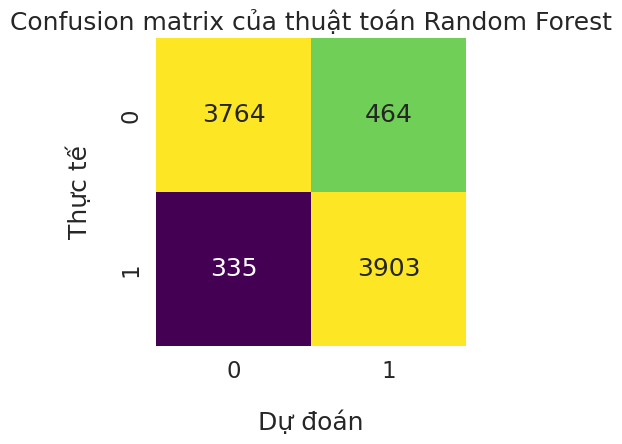

In [67]:
# vẽ confusion matrix
conf_matrix = confusion_matrix(y_test, y_tree, labels=[0, 1])
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.5)
ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='viridis', vmax=500
)
ax.set_xlabel("Dự đoán", labelpad=20)
ax.set_ylabel("Thực tế", labelpad=20)
plt.title("Confusion matrix của thuật toán Random Forest")
plt.show()

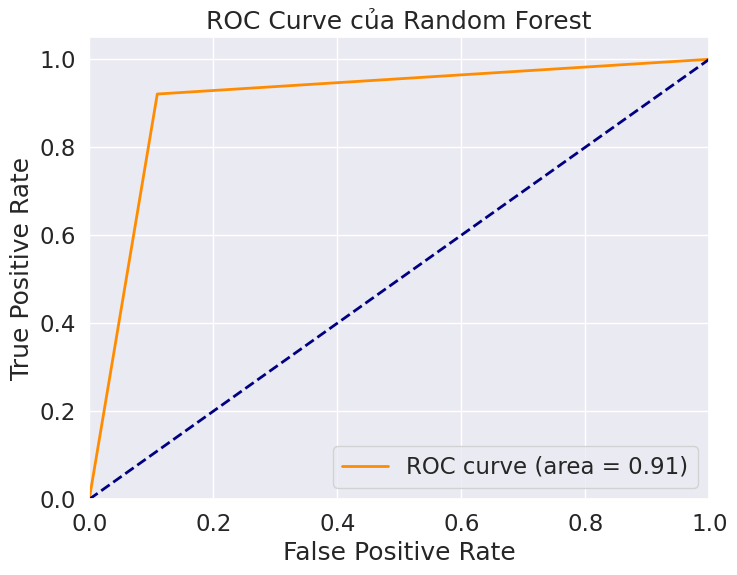

In [47]:
# Tính đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_tree)

# Tính ROC AUC
roc_auc = roc_auc_score(y_test, y_tree)

# Vẽ hình ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve của Random Forest')
plt.legend(loc='lower right')
plt.show()

Xây dựng mô hình K-Nearest Neighbours

In [48]:
# Import mô hình Naive Bayes
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Tìm giá trị K để đưa vào mô hình KNN sao cho tốt nhất
k_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracy_list = []

for i in k_list:
  # với mỗi i, chạy model 1 lần để tính accuracy
  model_knn_i = KNeighborsClassifier(n_neighbors=i)
  model_knn_i.fit(x_train,y_train)
  y_knn=model_knn_i.predict(x_test)
  classification_knn = classification_report(y_test, y_knn, target_names=["Không tiểu đường", "Có tiểu đường"])
  report_knn = classification_report(y_test, y_knn, output_dict=True)
  accuracy_knn_i = report_knn['accuracy']
  accuracy_list.append(accuracy_knn_i)

In [50]:
# Chuyển thành 1 dataframe
k_data = {'Giá trị K': k_list, 'Độ chuẩn xác (Accuracy)': accuracy_list}
kdf = pd.DataFrame(k_data)

# Tính độ chuẩn xác là lấy độ chuẩn xác cao nhất
kdf_sorted = kdf.sort_values(by='Độ chuẩn xác (Accuracy)', ascending=False)
kdf_sorted

,Giá trị K,Độ chuẩn xác (Accuracy)
3,9,0.851760
5,13,0.851288
7,17,0.850224
2,7,0.850106
6,15,0.849161
4,11,0.848925
1,5,0.848807
8,19,0.848453
9,21,0.848453
0,3,0.843964


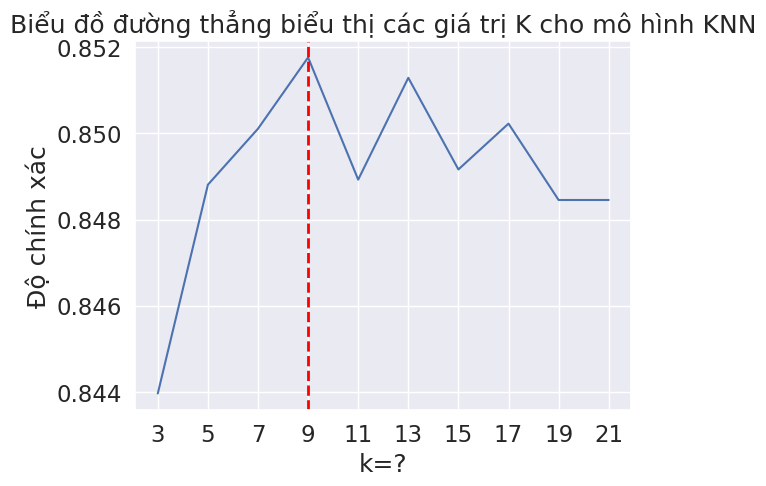

In [51]:
# Vẽ biểu đồ đường thẳng cho các giá trị K của thuật toán
plt.plot(kdf['Giá trị K'], kdf['Độ chuẩn xác (Accuracy)'])
plt.xlabel('k=?')
plt.ylabel('Độ chính xác')
plt.title('Biểu đồ đường thẳng biểu thị các giá trị K cho mô hình KNN')
plt.grid(True)
plt.xticks(range(3, 22, 2))
# Tìm giá trị K to nhất và gạch đỏ
max_y_index = kdf['Độ chuẩn xác (Accuracy)'].idxmax()
plt.axvline(x=kdf['Giá trị K'][max_y_index], color='red', linestyle='--', label='Max Y', linewidth=2)
plt.show()

In [52]:
# Train mô hình
start_time_knn = time.time()
model_knn = KNeighborsClassifier(n_neighbors=11)   # lấy n = 11 để được độ chuẩn xác cao nhất
model_knn.fit(x_train,y_train)

# Tính toán độ chính xác của mô hình
y_knn=model_knn.predict(x_test)
end_time_knn = time.time()
run_time_knn = end_time_knn - start_time_knn

In [53]:
# Classification Report
classification_knn = classification_report(y_test, y_knn, target_names=["Không tiểu đường", "Có tiểu đường"])
print(classification_knn)

                  precision    recall  f1-score   support

Không tiểu đường       0.87      0.82      0.84      4228
   Có tiểu đường       0.83      0.88      0.85      4238

        accuracy                           0.85      8466
       macro avg       0.85      0.85      0.85      8466
    weighted avg       0.85      0.85      0.85      8466



In [54]:
# In ra thông tin chỉ số Classification Report
report_knn = classification_report(y_test, y_knn, output_dict=True)

# Lấy precision, recall, F1-score của từng lớp và accuracy
precision_knn = report_knn['0']['precision'], report_knn['1']['precision']
recall_knn = report_knn['0']['recall'], report_knn['1']['recall']
f1_score_knn = report_knn['0']['f1-score'], report_knn['1']['f1-score']
accuracy_knn = report_knn['accuracy']

print("Precision cho lớp 'Không tiểu đường':", precision_knn[0])
print("Precision cho lớp 'Có tiểu đường':", precision_knn[1])
print()
print("Recall cho lớp 'Không tiểu đường':", recall_knn[0])
print("Recall cho lớp 'Có tiểu đường':", recall_knn[1])
print()
print("F1-score cho lớp 'Không tiểu đường':", f1_score_knn[0])
print("F1-score cho lớp 'Có tiểu đường':", f1_score_knn[1])
print()
print("Accuracy của phép tree:", accuracy_knn)

# Hiệu suất thời gian
print(f'Hiệu suất thời gian cho mô hình K-Nearest Neighbors là: {round(run_time_knn,3)} giây')

Precision cho lớp 'Không tiểu đường': 0.8705704950992712
Precision cho lớp 'Có tiểu đường': 0.8297303320704257

Recall cho lớp 'Không tiểu đường': 0.8192999053926207
Recall cho lớp 'Có tiểu đường': 0.8784804152902312

F1-score cho lớp 'Không tiểu đường': 0.84415742658706
F1-score cho lớp 'Có tiểu đường': 0.8534097421203438

Accuracy của phép tree: 0.8489251122135602
Hiệu suất thời gian cho mô hình K-Nearest Neighbors là: 0.606 giây


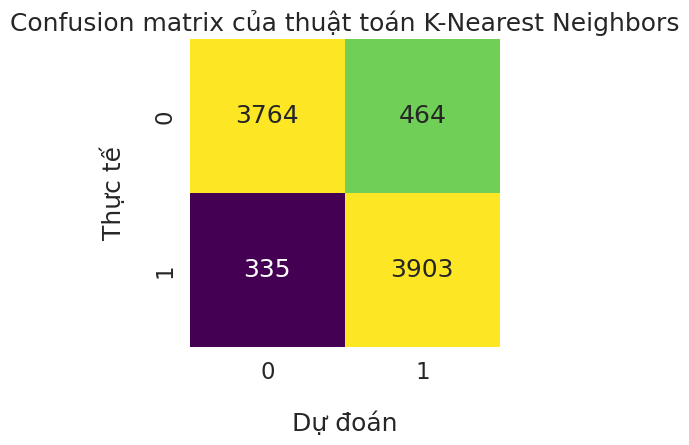

In [55]:
# Vẽ confusion matrix
conf_matrix = confusion_matrix(y_test, y_tree, labels=[0, 1])
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.5)
ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='viridis', vmax=500
)
ax.set_xlabel("Dự đoán", labelpad=20)
ax.set_ylabel("Thực tế", labelpad=20)
plt.title("Confusion matrix của thuật toán K-Nearest Neighbors")
plt.show()

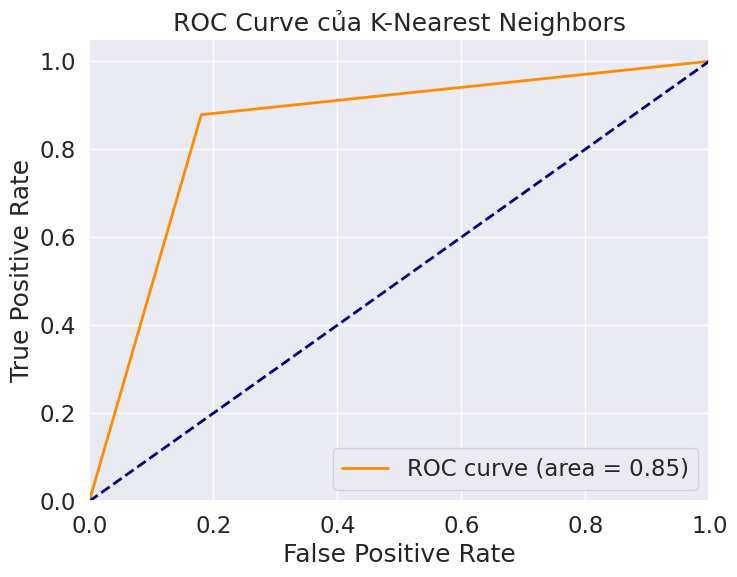

In [56]:
# Tính đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_knn)

# Tính ROC AUC
roc_auc = roc_auc_score(y_test, y_knn)

# Vẽ hình ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve của K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

Sau khi dựng xong mô hình, ta sẽ đánh giá toàn bộ các mô hình để lựa chọn cho phù hợp nhất

In [84]:
# Tạo dataframe cho bảng chỉ số và hiệu suất
model_header = ['', 'Precision', 'Recall', 'F1-score', 'Accuracy', 'Time Performance']
model_log_0 = ['Logistic Regression - No Diabetes', report_log['0']['precision'], report_log['0']['recall'], report_log['0']['f1-score'], report_log['accuracy'], run_time_log]
model_log_1 = ['Logistic Regression - Have Diabetes', report_log['1']['precision'], report_log['1']['recall'], report_log['1']['f1-score'], report_log['accuracy'], run_time_log]
model_GNB_0 = ['GNB - No Diabetes', report_GNB['0']['precision'], report_GNB['0']['recall'], report_GNB['0']['f1-score'], report_GNB['accuracy'], run_time_GNB]
model_GNB_1 = ['GNB - Have Diabetes', report_GNB['1']['precision'], report_GNB['1']['recall'], report_GNB['1']['f1-score'], report_GNB['accuracy'], run_time_GNB]
model_tree_0 = ['Decision Tree - No Diabetes', report_tree['0']['precision'], report_tree['0']['recall'], report_tree['0']['f1-score'], report_tree['accuracy'], run_time_tree]
model_tree_1 = ['Decision Tree - Have Diabetes', report_tree['1']['precision'], report_tree['1']['recall'], report_tree['1']['f1-score'], report_tree['accuracy'], run_time_tree]
model_knn_0 = ['K-Nearest Neighbors - No Diabetes', report_knn['0']['precision'], report_knn['0']['recall'], report_knn['0']['f1-score'], report_knn['accuracy'], run_time_knn]
model_knn_1 = ['K-Nearest Neighbors - Have Diabetes', report_knn['1']['precision'], report_knn['1']['recall'], report_knn['1']['f1-score'], report_knn['accuracy'], run_time_knn]

model_data = [model_header, model_log_0, model_log_1, model_GNB_0, model_GNB_1, model_tree_0, model_tree_1, model_knn_0, model_knn_1]
model_df = pd.DataFrame(model_data)
model_df.columns = model_df.iloc[0]
model_df = model_df.drop(0)
model_df = model_df.reset_index(drop=True)
model_df

,,Precision,Recall,F1-score,Accuracy,Time Performance
0,Logistic Regression - No Diabetes,0.872753,0.884106,0.878393,0.877746,0.154232
1,Logistic Regression - Have Diabetes,0.882859,0.871402,0.877093,0.877746,0.154232
2,GNB - No Diabetes,0.782779,0.896641,0.835851,0.82412,0.00855
3,GNB - Have Diabetes,0.879382,0.75177,0.810584,0.82412,0.00855
4,Decision Tree - No Diabetes,0.918273,0.890255,0.904047,0.905622,41.775671
5,Decision Tree - Have Diabetes,0.893749,0.920953,0.907147,0.905622,41.775671
6,K-Nearest Neighbors - No Diabetes,0.87057,0.8193,0.844157,0.848925,0.606006
7,K-Nearest Neighbors - Have Diabetes,0.82973,0.87848,0.85341,0.848925,0.606006


In [85]:
# Giữ lại dữ liệu chưa thêm dấu %
stored = model_df.copy()

# Xử lý làm tròn và thêm ký hiệu phần trăm
model_df[['Precision', 'Recall', 'F1-score', 'Accuracy']] = model_df[['Precision', 'Recall', 'F1-score', 'Accuracy']].astype(float).round(4)
model_df['Time Performance'] = model_df['Time Performance'].astype(float).round(2)
model_df[['Precision', 'Recall', 'F1-score', 'Accuracy']] = model_df[['Precision', 'Recall', 'F1-score', 'Accuracy']].applymap(lambda x: f'{x * 100:.2f}%')
model_df

,,Precision,Recall,F1-score,Accuracy,Time Performance
0,Logistic Regression - No Diabetes,87.28%,88.41%,87.84%,87.77%,0.15
1,Logistic Regression - Have Diabetes,88.29%,87.14%,87.71%,87.77%,0.15
2,GNB - No Diabetes,78.28%,89.66%,83.59%,82.41%,0.01
3,GNB - Have Diabetes,87.94%,75.18%,81.06%,82.41%,0.01
4,Decision Tree - No Diabetes,91.83%,89.03%,90.40%,90.56%,41.78
5,Decision Tree - Have Diabetes,89.37%,92.10%,90.71%,90.56%,41.78
6,K-Nearest Neighbors - No Diabetes,87.06%,81.93%,84.42%,84.89%,0.61
7,K-Nearest Neighbors - Have Diabetes,82.97%,87.85%,85.34%,84.89%,0.61


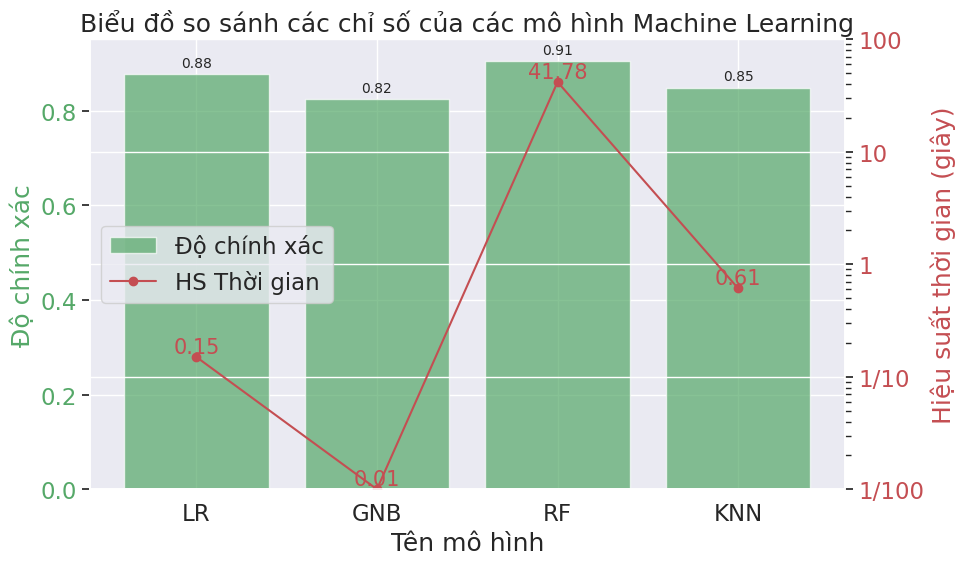

In [105]:
# Lấy data
x = ['LR', 'GNB', 'RF', 'KNN']  # Cột X - tên 4 model
accuracy = stored['Accuracy'][1::2]  # Cột y1 - Accuracy (Độ chính xác của từng model)
time_performance = model_df['Time Performance'][1::2]  # Cột y2 - Time Performance (HS thời gian chỉ lấy giá trị index chẵn)

# Chọn size cho biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tạo cột cho y1 (Accuracy) và giá trị đặt ở bên trái
bars = ax1.bar(x, accuracy, color='g', alpha=0.7, label='Độ chính xác')
ax1.set_xlabel('Tên mô hình')
ax1.set_ylabel('Độ chính xác', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Tạo đường Line cho y2 (Time Performance) và giá trị đặt ở bên phải
ax2 = ax1.twinx()
ax2.plot(x, time_performance, color='r', marker='o', label='HS Thời gian')
ax2.set_ylabel('Hiệu suất thời gian (giây)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Thêm giá trị cho từng cột của 'Accuracy'
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Giá trị của cột y2 đặt ở thang Log
ax2.set_yscale('log')  # Set y-axis to logarithmic scale

# Thêm tick tự chọn cho thang Log
tick_locations = [1/100, 1/10, 1, 10, 100]
ax2.yaxis.set_major_locator(ticker.FixedLocator(tick_locations))
ax2.set_yticklabels([f'1/{int(1/t)}' if t < 1 else str(int(t)) for t in tick_locations])

# Giá trị cao nhất của cột y2 là 100
ax2.set_ylim(1/100, 100)

# Thêm giá trị cho từng điểm của 'Time Performance'
for i, value in enumerate(time_performance):
    ax2.text(x[i], value, f'{value:.2f}', ha='center', va='bottom', color='r', fontsize=15)

# Thêm chú thích (LEGENDs)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left')

# Đổi tên biểu đồ và độ xoay ngang dọc
plt.title('Biểu đồ so sánh các chỉ số của các mô hình Machine Learning')
plt.xticks(rotation=45)
plt.grid(True)

# Vẽ hình
plt.tight_layout()
plt.show()